# David Alejandro Velázquez Valdéz A01632648

# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [69]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [70]:
url = "datasets/iris/iris.csv"

dataset = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [71]:
dataset.shape

(150, 5)

2. Drop rows with any missing values

In [72]:
dataset = dataset.dropna()
dataset.head(4)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


3. Encoding the class label categorical column: from string to num


In [73]:
# Encoding the categorical column
dataset = dataset.replace({'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [74]:
dataset.drop(['sepal length', 'sepal width'], axis = 'columns', inplace = True)

dataset

,petal length,petal width,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

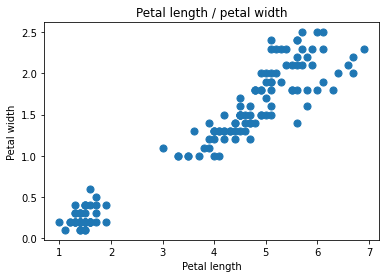

In [75]:
plt.scatter(dataset['petal length'], dataset['petal width'], s = 50)
plt.title('Petal length / petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

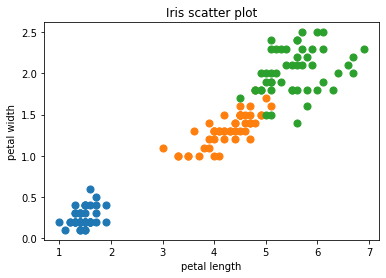

In [76]:
df1 = dataset[dataset['class'] == 0]
df2 = dataset[dataset['class'] == 1]
df3 = dataset[dataset['class'] == 2]

plt.scatter(df1['petal length'], df1['petal width'],  s = 50)
plt.scatter(df2['petal length'], df2['petal width'],  s = 50)
plt.scatter(df3['petal length'], df3['petal width'],  s = 50)

plt.title('Iris scatter plot')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [77]:
from sklearn.cluster import KMeans

K = 3

km = KMeans(n_clusters= K)

clusters = km.fit_predict(dataset[['petal length', 'petal width']])

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
dataset['cluster1'] = clusters
dataset

,petal length,petal width,class,cluster1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [79]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

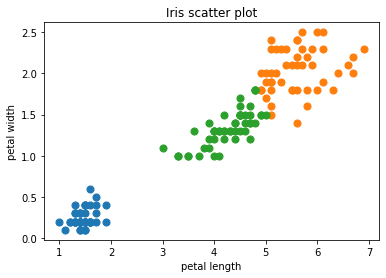

In [80]:
df1 = dataset[dataset.cluster1 == 0]
df2 = dataset[dataset.cluster1 == 1]
df3 = dataset[dataset.cluster1 == 2]

plt.scatter(df1['petal length'], df1['petal width'],  s = 50)
plt.scatter(df2['petal length'], df2['petal width'],  s = 50)
plt.scatter(df3['petal length'], df3['petal width'],  s = 50)

plt.title('Iris scatter plot')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [81]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['petal length', 'petal width']])
    sse.append(km.inertia_)

print(k_rng)
print(sse)

range(1, 10)
[550.8953333333333, 86.39021984551391, 31.371358974358966, 19.48300089968511, 13.91690875790876, 11.040239971910458, 9.342429217840985, 7.667019523446292, 6.57117684766214]


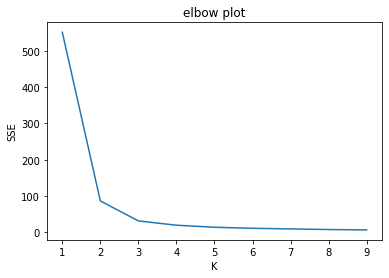

In [82]:
plt.plot(k_rng, sse)

plt.title('elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['petal length']])
dataset['petal length'] = scaler.transform(dataset[['petal length']])

scaler.fit(dataset[['petal width']])
dataset['petal width'] = scaler.transform(dataset[['petal width']])

dataset

,petal length,petal width,class,cluster1
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [85]:
dataset.describe()

,petal length,petal width,class,cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.013333
std,0.299203,0.317599,0.819232,0.827276
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


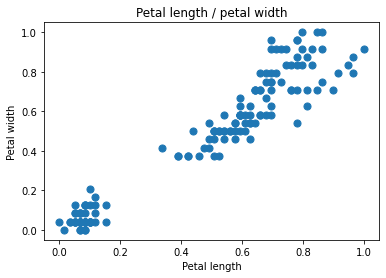

In [86]:
plt.scatter(dataset['petal length'], dataset['petal width'], s = 50)
plt.title('Petal length / petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [87]:
K = 3
km = KMeans(n_clusters = K)

clusters = km.fit_predict(dataset[['petal length', 'petal width']])
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
dataset['cluster2'] = clusters
dataset

,petal length,petal width,class,cluster1,cluster2
0,0.067797,0.041667,0,0,1
1,0.067797,0.041667,0,0,1
2,0.050847,0.041667,0,0,1
3,0.084746,0.041667,0,0,1
4,0.067797,0.041667,0,0,1
...,...,...,...,...,...
145,0.711864,0.916667,2,1,0
146,0.677966,0.750000,2,1,0
147,0.711864,0.791667,2,1,0
148,0.745763,0.916667,2,1,0


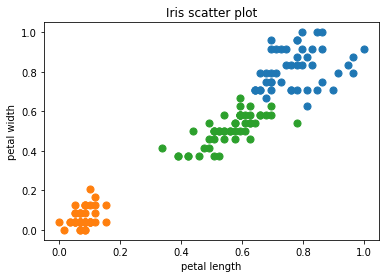

In [91]:
df1 = dataset[dataset.cluster2 == 0]
df2 = dataset[dataset.cluster2 == 1]
df3 = dataset[dataset.cluster2 == 2]

plt.scatter(df1['petal length'], df1['petal width'],  s = 50)
plt.scatter(df2['petal length'], df2['petal width'],  s = 50)
plt.scatter(df3['petal length'], df3['petal width'],  s = 50)

plt.title('Iris scatter plot')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()


# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not


    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it helps or not?

    Como son pocos los datos que se estan manejando, no ayuda mucho ya que es practicamente lo mismo, el clustering no se modifica mucho.

    - About the elbow plot: does the K agree with the real number of clusters?

    Si, ya que el elbow plot muestra que el número 3 es el indicado para hacer solamente 3 clusters, ya que si se hacen más no hay mucho impacto por delante. 

    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
    
    La mejor es separada por petal y sepal ya que no se puede hacer scatter con todas las variables de las flores, siendo más facil tambien la visualización y comparación de los valores entre variables de los petalos y sepalos.
    

# Parte 1

range(1, 10)
[28.36835321972719, 5.176463590044366, 1.701874688192097, 1.1588792731667128, 0.8535683225340074, 0.6801035704886194, 0.5651273455703979, 0.4880262556573532, 0.4136372577940613]


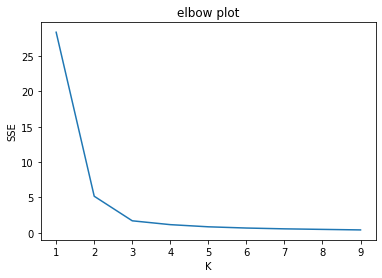

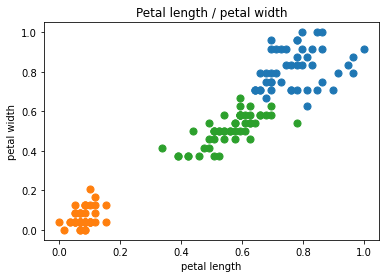

In [92]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['petal length', 'petal width']])
    sse.append(km.inertia_)

print(k_rng)
print(sse)

plt.plot(k_rng, sse)

plt.title('elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show()

df1 = dataset[dataset.cluster2 == 0]
df2 = dataset[dataset.cluster2 == 1]
df3 = dataset[dataset.cluster2 == 2]

plt.scatter(df1['petal length'], df1['petal width'], s = 50)
plt.scatter(df2['petal length'], df2['petal width'], s = 50)
plt.scatter(df3['petal length'], df3['petal width'], s = 50)

plt.title('Petal length / petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

# Punto 2

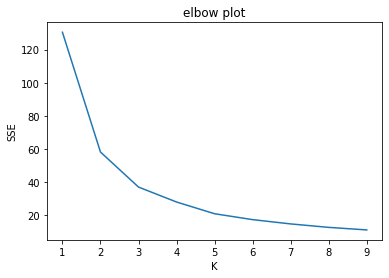

In [93]:
dataset = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
dataset = dataset.dropna()

dataset = dataset.replace({'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})
dataset.drop(['petal length', 'petal width'], axis = 'columns', inplace = True)
from sklearn.cluster import KMeans
K = 3
km = KMeans(n_clusters = k)
clusters = km.fit_predict(dataset[['sepal length', 'sepal width']])
dataset['cluster1'] = clusters
km.cluster_centers_

sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['sepal length', 'sepal width']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse)

plt.title('elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# Punto 3

In [94]:
dataset = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
dataset = dataset.dropna()
dataset = dataset.replace({'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})

from sklearn.cluster import KMeans
K = 3
km = KMeans(n_clusters = k)
clusters = km.fit_predict(dataset[['sepal length', 'sepal width', 'petal length', 'petal width']])

dataset['cluster1'] = clusters
print(clusters)
print(dataset)
print(km.cluster_centers_)

[5 0 0 0 5 5 0 5 0 0 5 0 0 0 5 5 5 5 5 5 5 5 0 5 0 0 5 5 5 0 0 5 5 5 0 0 5
 5 0 5 5 0 0 5 5 0 5 0 5 0 8 8 8 7 8 1 8 3 8 7 3 1 7 1 7 8 1 7 2 7 1 7 2 1
 8 8 8 8 1 7 7 7 7 2 1 1 8 1 7 7 7 1 7 3 7 7 7 1 3 7 6 2 4 6 6 4 7 4 6 4 6
 2 6 2 2 6 6 4 4 2 6 2 4 2 6 4 2 2 6 4 4 4 6 2 2 4 6 6 2 6 6 6 2 6 6 6 2 6
 6 2]
     sepal length  sepal width  petal length  petal width  class  cluster1
0             5.1          3.5           1.4          0.2      0         5
1             4.9          3.0           1.4          0.2      0         0
2             4.7          3.2           1.3          0.2      0         0
3             4.6          3.1           1.5          0.2      0         0
4             5.0          3.6           1.4          0.2      0         5
..            ...          ...           ...          ...    ...       ...
145           6.7          3.0           5.2          2.3      2         6
146           6.3          2.5           5.0          1.9      2         2
147           6.5  

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dataset[['sepal length']])
dataset['sepal length'] = scaler.transform(dataset[['sepal length']])

scaler.fit(dataset[['sepal width']])
dataset['sepal width'] = scaler.transform(dataset[['petal length']])

scaler.fit(dataset[['petal width']])
dataset['petal width'] = scaler.transform(dataset[['petal width']])
dataset

,sepal length,sepal width,petal length,petal width,class,cluster1
0,0.222222,-0.250000,1.4,0.041667,0,5
1,0.166667,-0.250000,1.4,0.041667,0,0
2,0.111111,-0.291667,1.3,0.041667,0,0
3,0.083333,-0.208333,1.5,0.041667,0,0
4,0.194444,-0.250000,1.4,0.041667,0,5
...,...,...,...,...,...,...
145,0.666667,1.333333,5.2,0.916667,2,6
146,0.555556,1.250000,5.0,0.750000,2,2
147,0.611111,1.333333,5.2,0.791667,2,6
148,0.527778,1.416667,5.4,0.916667,2,6


# Punto 4

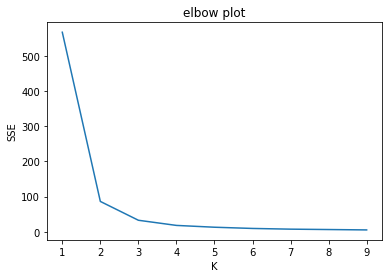

In [96]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['sepal length', 'sepal width', 'petal length', 'petal width']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse)

plt.title('elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()